# Basic libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

# Dataset Loading

In [8]:
dataset = pd.read_csv(
    'Suicide_Detection.csv',
    encoding='latin1',
    engine='python',
    quoting=csv.QUOTE_MINIMAL,
    usecols=[1, 2],         
    on_bad_lines='skip'
)


dataset.columns = ['text', 'class']

dataset = dataset[dataset['class'].isin(['suicide', 'non-suicide'])]

print(dataset.shape)
print(dataset.head())

(232045, 2)
                                                text        class
0  Ex Wife Threatening SuicideRecently I left my ...      suicide
1  Am I weird I don't get affected by compliments...  non-suicide
2  Finally 2020 is almost over... So I can never ...  non-suicide
3          i need helpjust help me im crying so hard      suicide
4  Iâm so lostHello, my name is Adam (16) and I...      suicide


# Dataset Analysis

In [11]:
dataset

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...
233332,If you don't like rock then your not going to ...,non-suicide
233333,You how you can tell i have so many friends an...,non-suicide
233334,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
233335,The usual stuff you find hereI'm not posting t...,suicide


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232045 entries, 0 to 233336
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232045 non-null  object
 1   class   232045 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [15]:
dataset['text']

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I don't get affected by compliments...
2         Finally 2020 is almost over... So I can never ...
3                 i need helpjust help me im crying so hard
4         Iâm so lostHello, my name is Adam (16) and I...
                                ...                        
233332    If you don't like rock then your not going to ...
233333    You how you can tell i have so many friends an...
233334    pee probably tastes like salty teaðð¦â¼ï...
233335    The usual stuff you find hereI'm not posting t...
233336    I still haven't beaten the first boss in Hollo...
Name: text, Length: 232045, dtype: object

In [17]:
dataset['class']

0             suicide
1         non-suicide
2         non-suicide
3             suicide
4             suicide
             ...     
233332    non-suicide
233333    non-suicide
233334    non-suicide
233335        suicide
233336    non-suicide
Name: class, Length: 232045, dtype: object

In [19]:
#The below function removes everything except letters and spaces ... meaning it deletes numbers, punctuation, emojis, and special characters.
def refined_text(text):
    text = text.lower()
    cleaned = ''.join(c for c in text if c.isalpha() or c.isspace())
    return cleaned

dataset['text'] = dataset['text'].apply(refined_text)

In [21]:
dataset.isnull().sum().sum()

0

In [23]:
dataset.duplicated().sum()

199

In [25]:
dataset.drop_duplicates(inplace=True)

In [27]:
dataset.duplicated().sum()

0

In [29]:
#Checking total suicide and non-suicide data before encoding
dataset['class'].value_counts()

class
suicide        116017
non-suicide    115829
Name: count, dtype: int64

In [31]:
#Using label encoder as it's the best for binary classification and it is always used on output features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['class'] = encoder.fit_transform(dataset['class'])

In [33]:
dataset.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,1
1,am i weird i dont get affected by compliments ...,0
2,finally is almost over so i can never hear h...,0
3,i need helpjust help me im crying so hard,1
4,iâm so losthello my name is adam and iâve bee...,1


# Further analysis

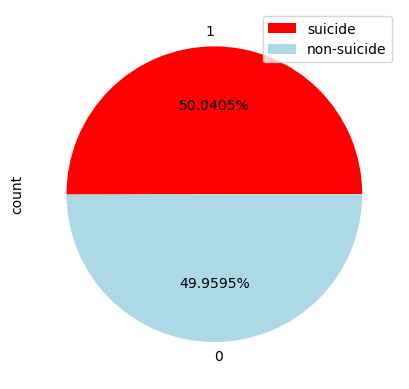

In [36]:
#A simple pie plot of data distribution
dataset['class'].value_counts().plot.pie(autopct='%1.4f%%', colors=['red', 'lightblue'])

plt.legend(['suicide', 'non-suicide'])
plt.show()

# Basic Model part

In [39]:
# make all of the string lower case
dataset['text'] = dataset['text'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [41]:
dataset['text']

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally  is almost over so i can never hear  h...
3                 i need helpjust help me im crying so hard
4         im so losthello my name is adam  and ive been ...
                                ...                        
233332    if you dont like rock then your not going to g...
233333    you how you can tell i have so many friends an...
233334    pee probably tastes like salty tea can someone...
233335    the usual stuff you find hereim not posting th...
233336    i still havent beaten the first boss in hollow...
Name: text, Length: 231846, dtype: object

In [43]:
x = dataset['text']
y = dataset['class']

In [45]:
#Train-test split..20% test dataset is kept as it's standard practice
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
#Used TfidfVectorizer to turn the text into numbers based on how important each word is, while ignoring common English words like “the” or “and.”
#TF-IDF will downweight common words like “I,” “but,” “not” and give more importance to unique words like “sad” or “today,” which help the model understand the emotional tone of the text.
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')

x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)

In [49]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=50,         
    max_depth=10,            
    n_jobs=-1,              
    random_state=42
)

rf.fit(x_train_vec, y_train)


y_pred = rf.predict(x_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.808410610308389
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     23276
           1       0.89      0.70      0.78     23094

    accuracy                           0.81     46370
   macro avg       0.82      0.81      0.81     46370
weighted avg       0.82      0.81      0.81     46370



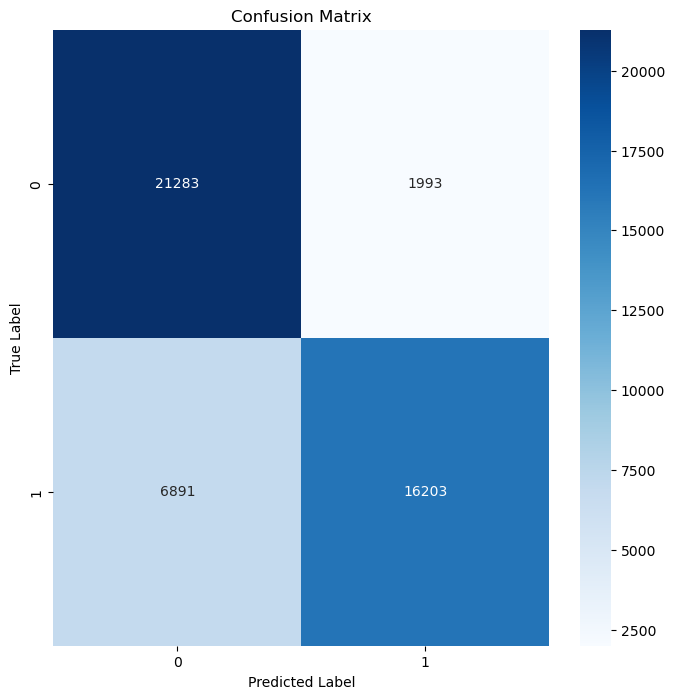

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

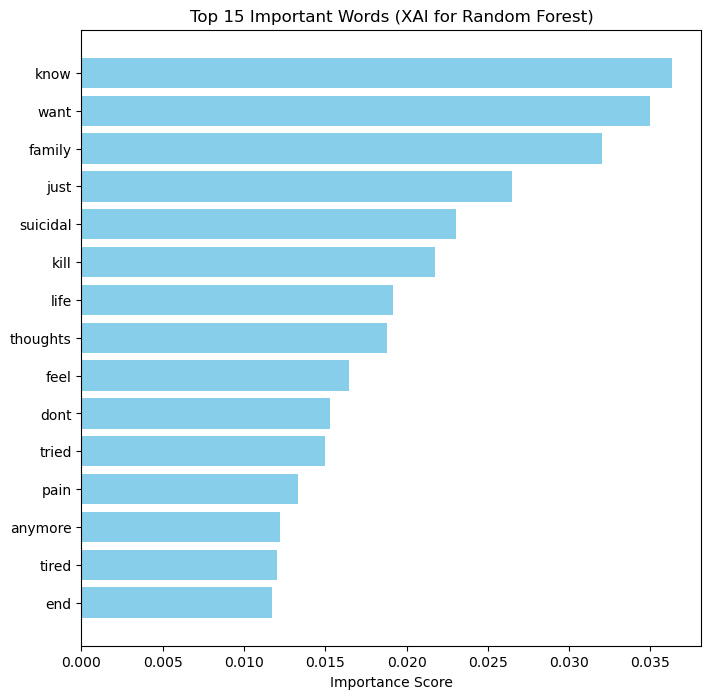

In [53]:
#implementing XAI
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:][::-1]   # if you wanna increase words tune here...if you wanna increase put -30/-40.. or if wanna decrease then write -10/-5..
features = [vec.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(8,8))
plt.barh(range(len(indices)), importances[indices][::-1], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in range(len(features))][::-1])
plt.xlabel("Importance Score")
plt.title("Top 15 Important Words (XAI for Random Forest)")
plt.show()


In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


decision_model = DecisionTreeClassifier(max_depth=8, min_samples_split=20, random_state=42)
decision_model.fit(x_train_vec, y_train)


y_pred = decision_model.predict(x_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.842937243907699
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     23276
           1       0.87      0.80      0.84     23094

    accuracy                           0.84     46370
   macro avg       0.85      0.84      0.84     46370
weighted avg       0.85      0.84      0.84     46370



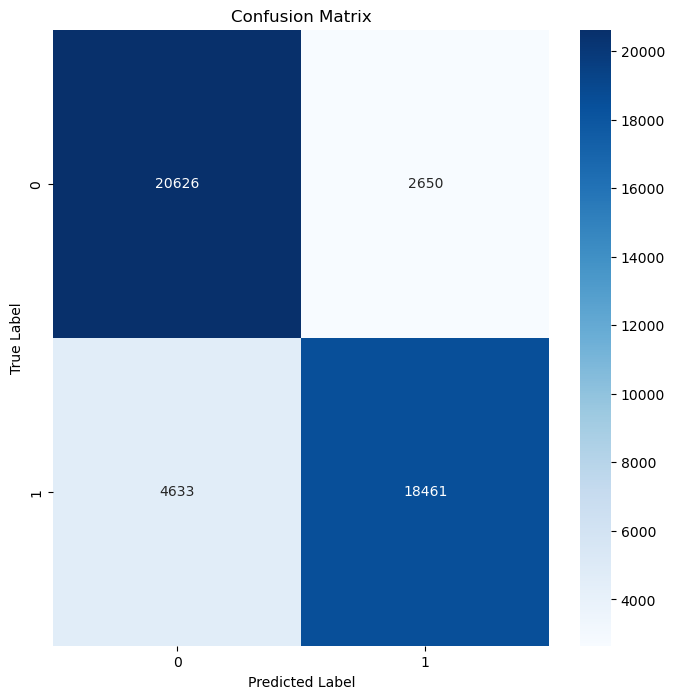

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

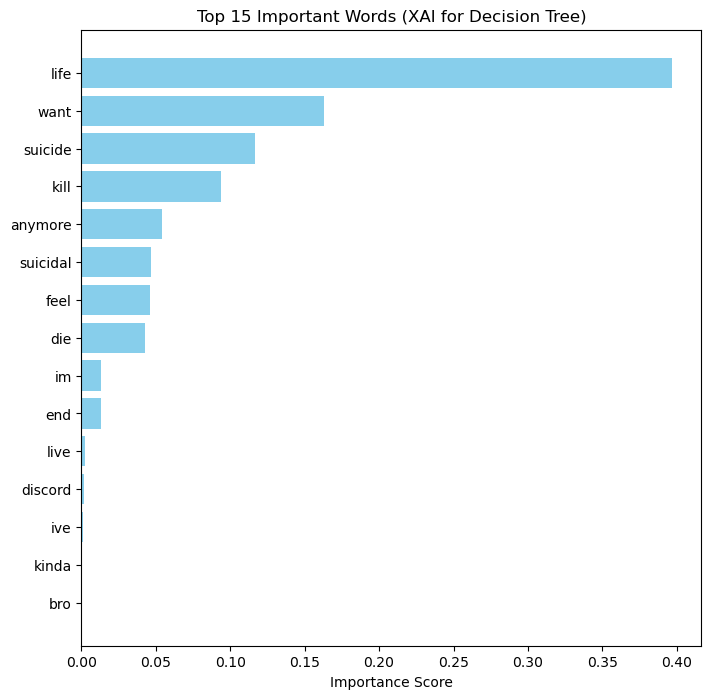

In [59]:
importances = decision_model.feature_importances_
indices = np.argsort(importances)[-15:][::-1]   # if you wanna increase words tune here...if you wanna increase put -30/-40.. or if wanna decrease then write -10/-5..
features = [vec.get_feature_names_out()[i] for i in indices]


plt.figure(figsize=(8,8))
plt.barh(range(len(indices)), importances[indices][::-1], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in range(len(features))][::-1])
plt.xlabel("Importance Score")
plt.title("Top 15 Important Words (XAI for Decision Tree)")
plt.show()

In [61]:
#LightGBM
from lightgbm import LGBMClassifier

light = LGBMClassifier(n_estimators=100, learning_rate=0.1)
light.fit(x_train_vec, y_train)

[LightGBM] [Info] Number of positive: 92923, number of negative: 92553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.724537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928358
[LightGBM] [Info] Number of data points in the train set: 185476, number of used features: 14752
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500997 -> initscore=0.003990
[LightGBM] [Info] Start training from score 0.003990


LGBMClassifier()

In [63]:
y_pred = light.predict(x_test_vec)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     23276
           1       0.92      0.90      0.91     23094

    accuracy                           0.91     46370
   macro avg       0.92      0.91      0.91     46370
weighted avg       0.92      0.91      0.91     46370



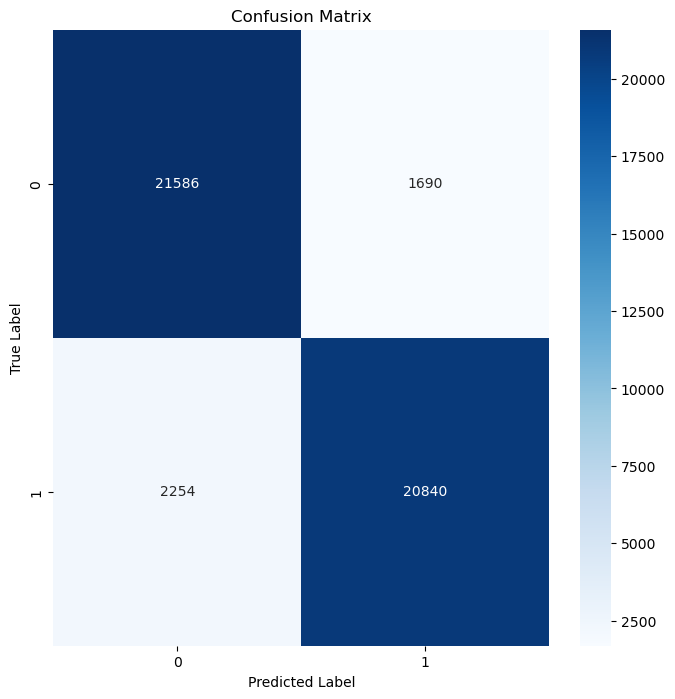

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

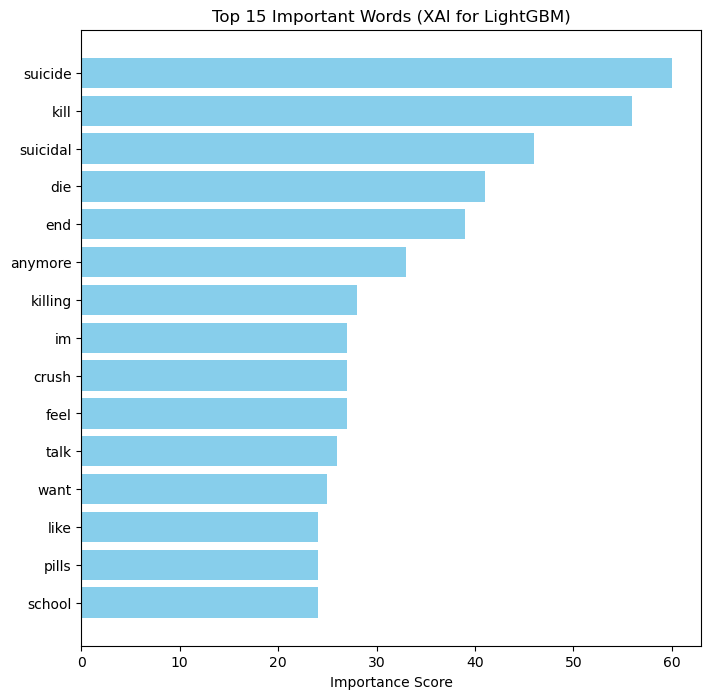

In [69]:
importances = light.feature_importances_
indices = np.argsort(importances)[-15:][::-1]  # if you wanna increase words tune here...if you wanna increase put -30/-40.. or if wanna decrease then write -10/-5..
features = [vec.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(8,8))
plt.barh(range(len(indices)), importances[indices][::-1], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in range(len(features))][::-1])
plt.xlabel("Importance Score")
plt.title("Top 15 Important Words (XAI for LightGBM)")
plt.show()